In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.graph_objects as go

from formulas import *

sp = pd.read_csv('StudentsPerformance.csv')

colors = ["blue", "red", "green", "purple", "orange", "black"]

sp["total_score"] = (sp["math score"]+sp["reading score"]+sp["writing score"]) # acrescenta o total de cada aluno
sp["avg"]         = (sp["total_score"]/300)*100 # acrescenta a média de cada aluno

sp.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score        avg  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [2]:
# apenas os valores, com a função especificada.

def Numbers(array, func):
    el_list = {}
    for element in array:
        el_list[element] = [ func(*[score for score in sp[sp.values  == element]['math score']]),
                          func(*[score for score in sp[sp.values  == element]['reading score']]),
                          func(*[score for score in sp[sp.values  == element]['writing score']])]
    return el_list

def specificNumbers(specific_sp, array, func):
    el_list = {}
    for element in array:
        el_list[element] = [ func(*[score for score in specific_sp[specific_sp.values  == element]['math score']]),
                             func(*[score for score in specific_sp[specific_sp.values  == element]['reading score']]),
                             func(*[score for score in specific_sp[specific_sp.values  == element]['writing score']])
                           ]
    return el_list

def mTrimmMean(array):
    el_list = {}
    for element in array:
        el_list[element] = [ trimmed_mean([score for score in sp[sp.values  == element]['math score']   ], 0.1),
                             trimmed_mean([score for score in sp[sp.values  == element]['reading score']], 0.1),
                             trimmed_mean([score for score in sp[sp.values  == element]['writing score']], 0.1)]
    return el_list


In [3]:
def tMeanValues(label):
    grades = [element for element in sp[label].unique()]
    
    avg = mTrimmMean(grades)

    fig = go.Figure(data=[ go.Bar(name='math score',    x=grades, y=[ avg[k][0] for k in avg ]),
                           go.Bar(name='reading score', x=grades, y=[ avg[k][1] for k in avg ] ),
                           go.Bar(name='writing score', x=grades, y=[ avg[k][2] for k in avg ] ) ])

    # Change the bar mode
    fig.update_layout(barmode='group')
    fig.show()



tMeanValues("gender")

In [4]:
def specificStoriogramsTotal(label):
    grades = [element for element in sp[label].unique()]
    
    for grade in grades:
        print(grade)
        plt.figure(figsize = (16,5))
        plt.subplot(1, 3, 1)
        sns.histplot(sp[sp.values  == grade ]['total_score'])

def specificStoriograms(label):
    grades = [element for element in sp[label].unique()]
    
    for grade in grades:
        print(grade)
        plt.figure(figsize = (16,5))
        plt.subplot(1, 3, 1)
        sns.histplot(sp[sp.values  == grade ]['math score'])

        plt.subplot(1, 3, 2)
        sns.histplot(sp[sp.values  == grade ]['reading score'])

        plt.subplot(1, 3, 3)
        sns.histplot(sp[sp.values  == grade ]['writing score'])
    

standard
free/reduced


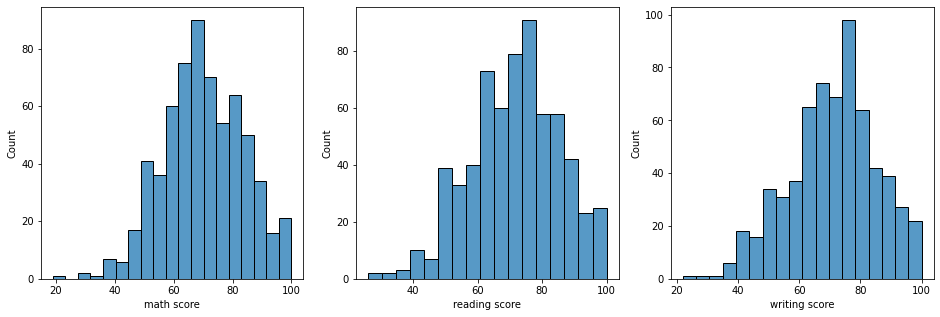

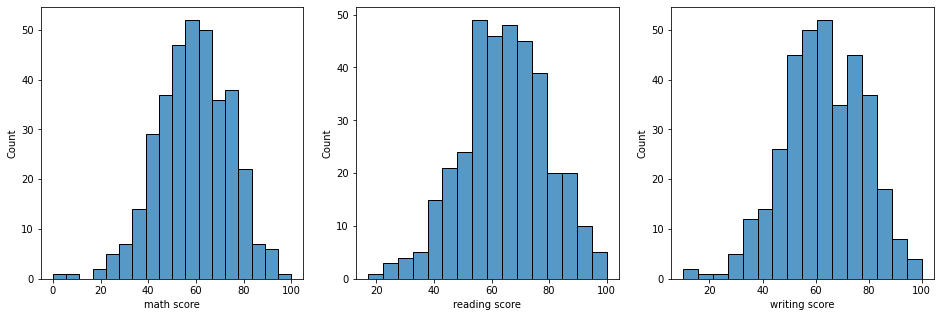

In [5]:
specificStoriograms("lunch")


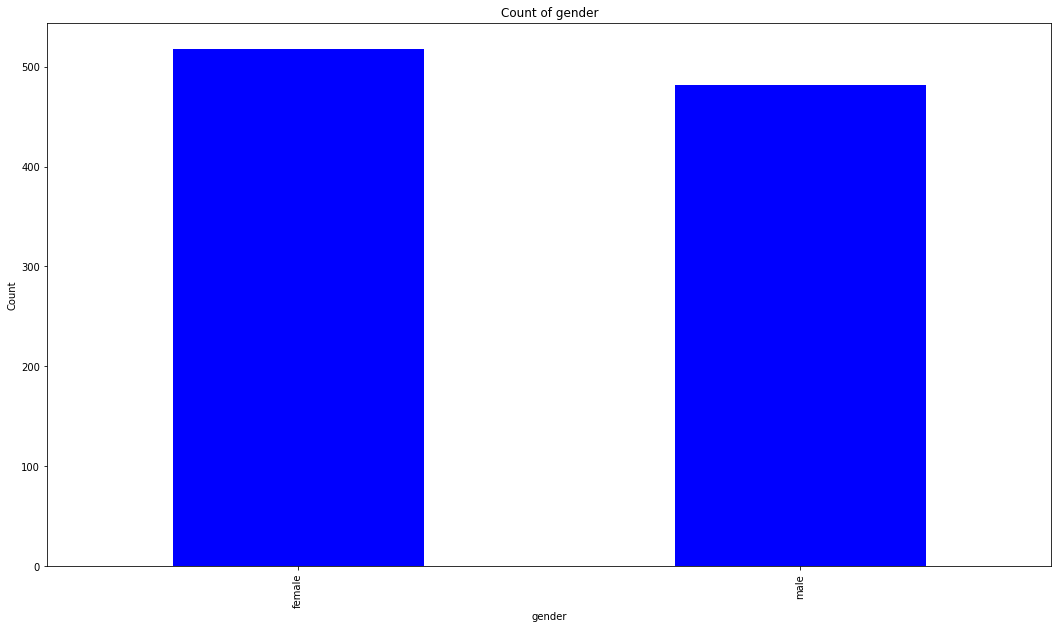

In [6]:
def visualCounting(data, rep_color):
    # visualizing writing score
    plt.subplots(figsize=(15,5))
    sp[data].value_counts(normalize = True)
    sp[data].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = rep_color)
    plt.title('Count of ' + data)
    plt.xlabel(data)
    plt.ylabel('Count')
    plt.show()
    
visualCounting("gender", "blue")

In [7]:
# Graficos com base em uma função

def drawGraphs(elements, func):
    grades = [element for element in sp[elements].unique()]

    avg = Numbers(grades, func)

    fig = go.Figure(data=[ go.Bar(name='math score',    x=grades, y=[ avg[k][0] for k in avg ]),
                           go.Bar(name='reading score', x=grades, y=[ avg[k][1] for k in avg ] ),
                           go.Bar(name='writing score', x=grades, y=[ avg[k][2] for k in avg ] ) ])
    
    # Change the bar mode
    fig.update_layout(barmode='group')
    fig.show()
    

In [8]:
drawGraphs("gender", mean)


In [9]:
# Graficos scatter 3D de vários elementos unidos

def draw3DGraphs(data):
    # Creating figure
    fig = plt.figure(figsize = (20, 10))
    ax = plt.axes(projection ='3d')
    
    el_list = {}
    
    division = [field for field in sp[data].unique()]
    
    colors_index = 0
    for element in division:
        ax.scatter3D( [score for score in sp[sp.values  == element]['math score']],
                      [score for score in sp[sp.values  == element]['reading score']],
                      [score for score in sp[sp.values  == element]['writing score']], 
                      color = colors[colors_index] )
        print(element, " ", colors[colors_index])
        colors_index+=1
        
        
    plt.title('3D plot')
    
    ax.set_xlabel('math score')
    ax.set_ylabel('reading score')
    ax.set_zlabel('writing score')
    
    # show plot
    plt.show()


standard   blue
free/reduced   red


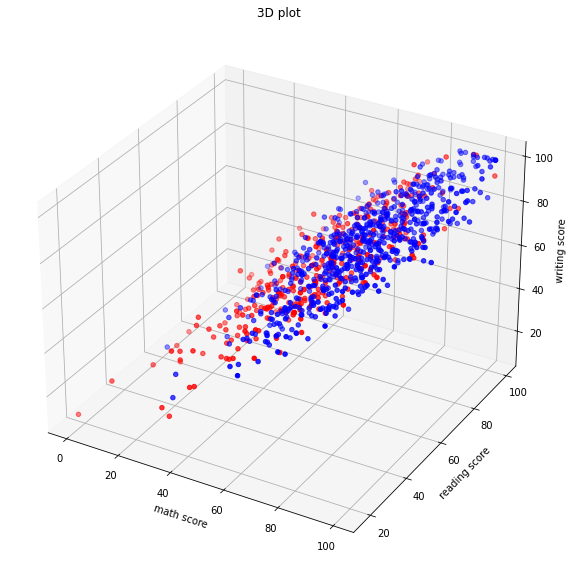

In [10]:
draw3DGraphs("lunch")

female   blue
male   red


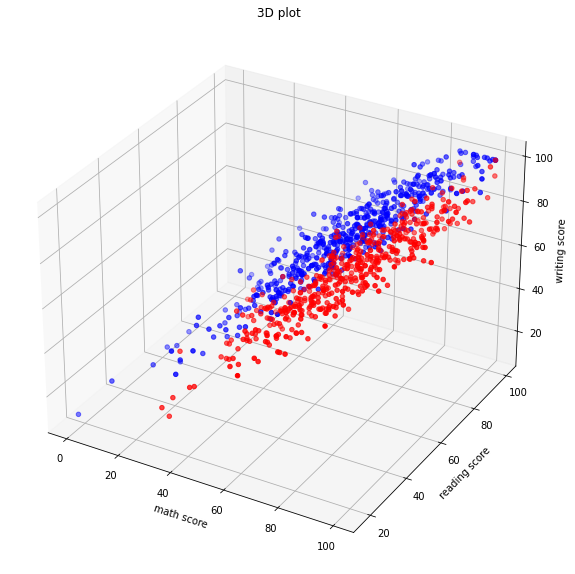

In [11]:
draw3DGraphs("gender")

group B   blue
group C   red
group A   green
group D   purple
group E   orange


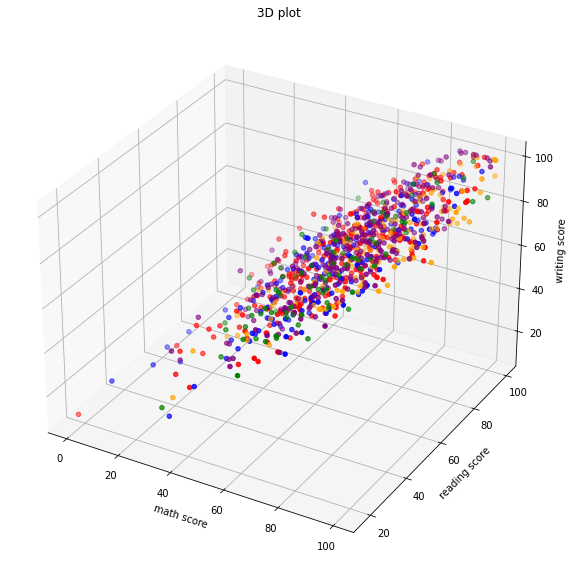

In [12]:
draw3DGraphs("race/ethnicity")

bachelor's degree   blue
some college   red
master's degree   green
associate's degree   purple
high school   orange
some high school   black


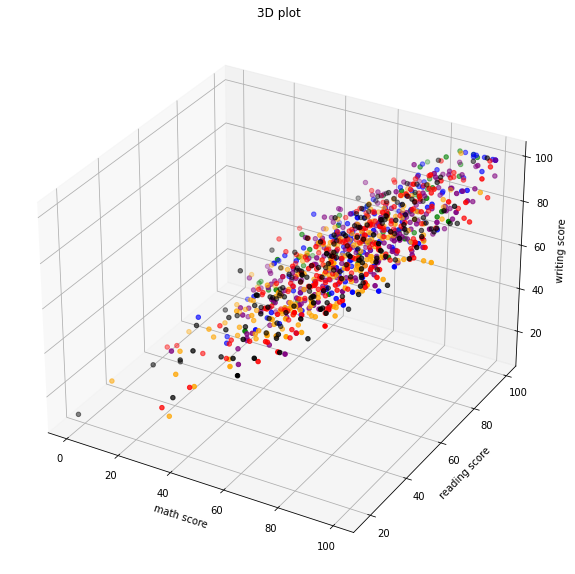

In [13]:
draw3DGraphs("parental level of education")

none   blue
completed   red


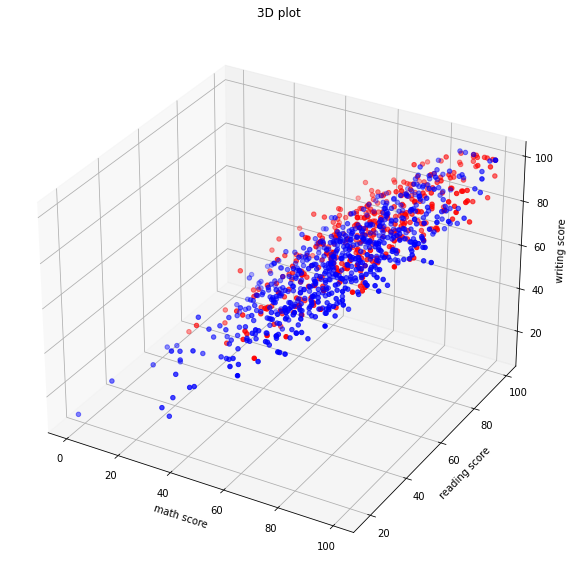

In [14]:
draw3DGraphs("test preparation course")

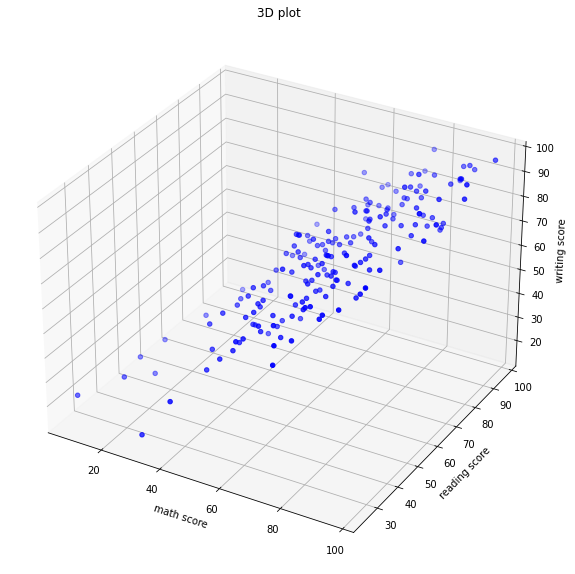

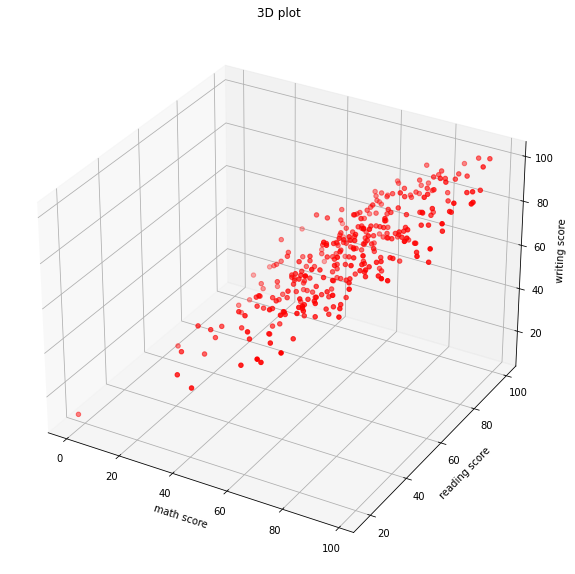

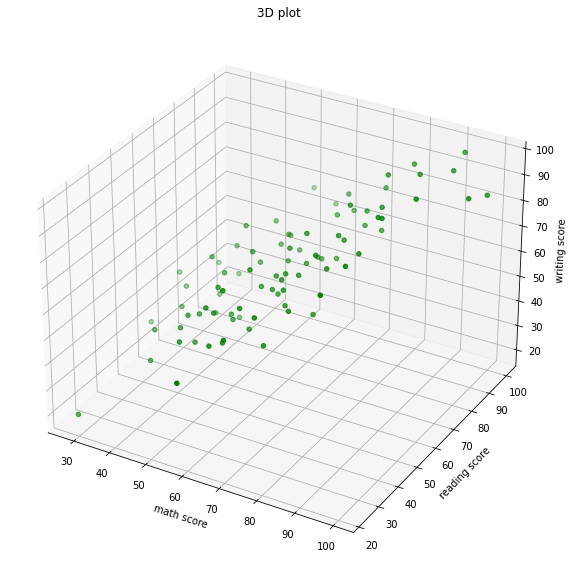

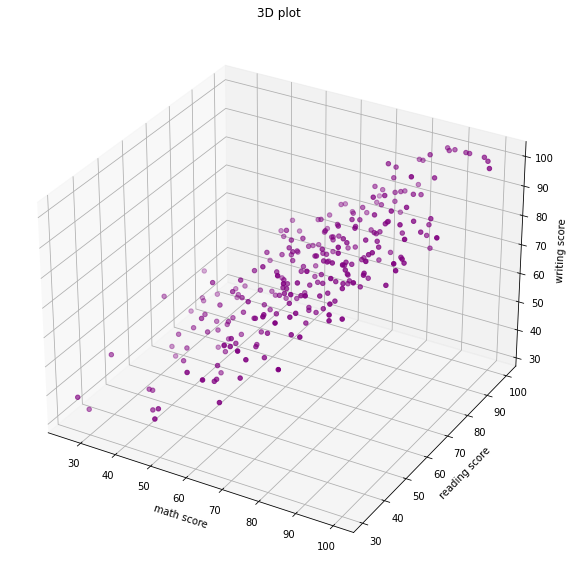

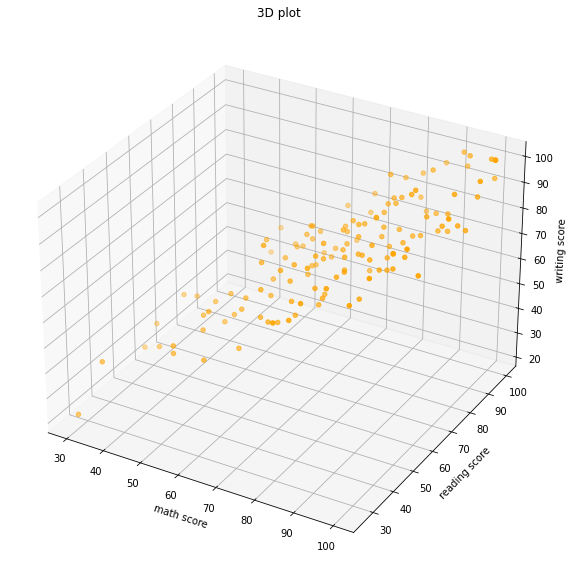

['group B blue', 'group C red', 'group A green', 'group D purple', 'group E orange']


In [15]:
# Graficos de varios elementos separados

def draw3DSeparatedGraphs(data):
    # Creating figure
    
    el_list = {}
    
    division = [field for field in sp[data].unique()]
    
    colors_index = 0
    colors_subtitle = []
    for element in division:
        fig = plt.figure(figsize = (20, 10))
        ax = plt.axes(projection ='3d')
        
        ax.scatter3D( [score for score in sp[sp.values  == element]['math score']],
                      [score for score in sp[sp.values  == element]['reading score']],
                      [score for score in sp[sp.values  == element]['writing score']], 
                      color = colors[colors_index] )
        colors_subtitle.append(element + " " + colors[colors_index])

        plt.title('3D plot')

        ax.set_xlabel('math score')
        ax.set_ylabel('reading score')
        ax.set_zlabel('writing score')

        # show plot
        plt.show()
        colors_index+=1
    print(colors_subtitle)
        
draw3DSeparatedGraphs("race/ethnicity")

In [16]:
# Correlação de vários elementos, os elementos de texto devem ser substituidos por números

def multipleCorrelation(other):
    math     = [score for score in sp['math score']]
    writing  = [score for score in sp['writing score']]
    reading  = [score for score in sp['reading score']]
    total    = [score for score in sp['total_score']   ]
    avg      = [score for score in sp['avg']           ]

    scores = [math, writing, reading, total, avg, other]
    corr_matrix = []

    for score in scores:
        aux = []
        for score2 in scores:
            aux.append(correlation_coefficient([score, score2]))
        corr_matrix.append(aux)

    sns.heatmap(corr_matrix, annot=True)
    plt.show()

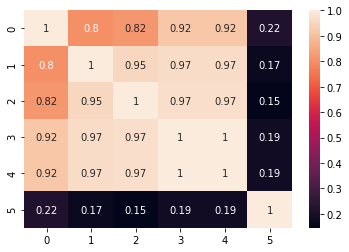

In [17]:
values = {"group A":1,"group B":2,"group C":3,"group D":4,"group E":5}
race   = [values[race] for race in sp["race/ethnicity"]]
multipleCorrelation(race)


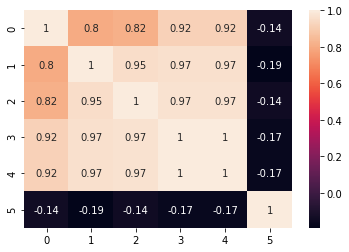

In [18]:
values   = {"bachelor's degree":1,"some college":2,"master's degree":3,"associate's degree":4,"high school":5,
            "some high school":6}
parental = [ values[level] for level in sp["parental level of education"]]
multipleCorrelation(parental)

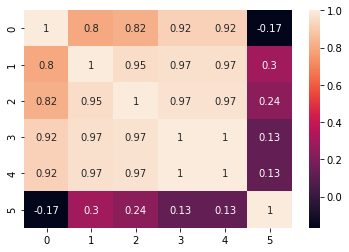

In [19]:
values = {"male":0,"female":1}
gender = [values[gender] for gender in sp["gender"]]
multipleCorrelation(gender)

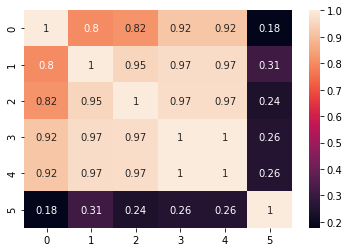

In [20]:
values   = {"none":0,"completed":1}
testPrep = [values[prepLevel] for prepLevel in sp["test preparation course"]]
multipleCorrelation(testPrep)

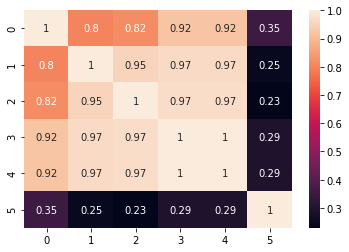

In [21]:
values = {"standard":1,"free/reduced":0}
lunch  = [values[lunch] for lunch in sp["lunch"]]
multipleCorrelation(lunch)

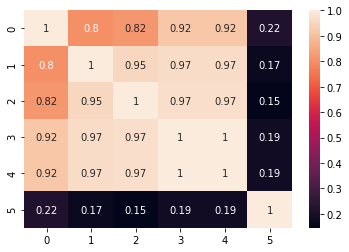

In [22]:
values = {"group A":1,"group B":2,"group C":3,"group D":4,"group E":5}
race   = [values[race] for race in sp["race/ethnicity"]]
multipleCorrelation(race)

In [23]:
values_race  = {"group A":1,"group B":2,"group C":3,"group D":4,"group E":5}
values_schoolar = {"bachelor's degree":1,"some college":2,"master's degree":3,"associate's degree":4,"high school":5,"some high school":6}
values_lunch = {"standard":1,"free/reduced":0}

race  = [values_race[race] for race in sp["race/ethnicity"]]
lunch = [values_lunch[lunch] for lunch in sp["lunch"]]
total = [score for score in sp['total_score']]

math     = [score for score in sp['math score']]
writing  = [score for score in sp['writing score']]
reading  = [score for score in sp['reading score']]


values = [race, lunch, math, writing, reading]
tab = []
for indx in range( len(race) ):
    tab.append( [race[indx], lunch[indx], math[indx], writing[indx], reading[indx]] )

# Separar grupos etnicos por tipo de almço consumido
A_standart = [ t for t in tab if (t[0] == values_race["group A"] and t[1] == values_lunch["standard"]) ]
A_free = [ t for t in tab if (t[0] == values_race["group A"] and t[1] == values_lunch["free/reduced"]) ]
B_standart = [ t for t in tab if (t[0] == values_race["group B"] and t[1] == values_lunch["standard"]) ]
B_free = [ t for t in tab if (t[0] == values_race["group B"] and t[1] == values_lunch["free/reduced"]) ]
C_standart = [ t for t in tab if (t[0] == values_race["group C"] and t[1] == values_lunch["standard"]) ]
C_free = [ t for t in tab if (t[0] == values_race["group C"] and t[1] == values_lunch["free/reduced"]) ]
D_standart = [ t for t in tab if (t[0] == values_race["group D"] and t[1] == values_lunch["standard"]) ]
D_free = [ t for t in tab if (t[0] == values_race["group D"] and t[1] == values_lunch["free/reduced"]) ]
E_standart = [ t for t in tab if (t[0] == values_race["group E"] and t[1] == values_lunch["standard"]) ]
E_free = [ t for t in tab if (t[0] == values_race["group E"] and t[1] == values_lunch["free/reduced"]) ]

# Separar grupos de nivel de escolaridade dos pais por tipo de almço consumido
bachelor_standart = [ t for t in tab if (t[0] == values_schoolar["bachelor's degree"] and t[1] == values_lunch["standard"]) ]
bachelor_free = [ t for t in tab if (t[0] == values_schoolar["bachelor's degree"] and t[1] == values_lunch["free/reduced"]) ]
some_standart = [ t for t in tab if (t[0] == values_schoolar["some college"] and t[1] == values_lunch["standard"]) ]
some_free = [ t for t in tab if (t[0] == values_schoolar["some college"] and t[1] == values_lunch["free/reduced"]) ]
master_standart = [ t for t in tab if (t[0] == values_schoolar["master's degree"] and t[1] == values_lunch["standard"]) ]
master_free = [ t for t in tab if (t[0] == values_schoolar["master's degree"] and t[1] == values_lunch["free/reduced"]) ]
associate_standart = [ t for t in tab if (t[0] == values_schoolar["associate's degree"] and t[1] == values_lunch["standard"]) ]
associate_free = [ t for t in tab if (t[0] == values_schoolar["associate's degree"] and t[1] == values_lunch["free/reduced"]) ]
high_standart = [ t for t in tab if (t[0] == values_schoolar["high school"] and t[1] == values_lunch["standard"]) ]
high_free = [ t for t in tab if (t[0] == values_schoolar["high school"] and t[1] == values_lunch["free/reduced"]) ]
somehigh_standart = [ t for t in tab if (t[0] == values_schoolar["some high school"] and t[1] == values_lunch["standard"]) ]
somehigh_free = [ t for t in tab if (t[0] == values_schoolar["some high school"] and t[1] == values_lunch["free/reduced"]) ]

In [24]:
# Comparar vetores de informações já separados

def compare3D(*dataSets):
    # Creating figure
    fig = plt.figure(figsize = (20, 10))
    ax = plt.axes(projection ='3d')
    
    color_index = 0
    for data in dataSets:
        [ ax.scatter3D( element[0], element[1], element[2], color = colors[color_index] ) for element in data ]
        color_index+=1
        
    plt.title('3D plot')
    
    ax.set_xlabel('math score')
    ax.set_ylabel('reading score')
    ax.set_zlabel('writing score')
    
    # show plot
    plt.show()
    

In [25]:
# comparar notas entre tipos diferentes de almoço

def CompareLunch(element, func):
    lunch_standart = sp[ sp.values  == "standard"     ]
    lunch_free     = sp[ sp.values  == "free/reduced" ]
    
    grades = [gender for gender in lunch_standart[element].unique()]

    avg_stnd = specificNumbers(lunch_standart, grades, func)
    avg_free = specificNumbers(lunch_free, grades, func)
    
    fig = go.Figure(data=[ go.Bar(name='standard', x=grades, y=[ avg_stnd[k][2] for k in avg_stnd ]),
                           go.Bar(name='free/reduced', x=grades, y=[ avg_free[k][2] for k in avg_free ]) 
                         ])
    
    # Change the bar mode
    fig.update_layout(barmode='group')
    fig.show()
    
CompareLunch("race/ethnicity", mean)
CompareLunch("parental level of education", mean)


In [26]:
# comparar notas entre tipos diferentes de curso de preparação

def comparePrepCourse(elements, func):
    prep_none = sp[ sp.values  == "none"      ]
    prep_complete     = sp[ sp.values  == "completed" ]
    
    groups = [element for element in prep_none[elements].unique()]

    avg_none = specificNumbers(prep_none, groups, func)
    avg_cmpl = specificNumbers(prep_complete, groups, func)
    
    fig = go.Figure(data=[ go.Bar(name='none', x=groups, y=[ avg_none[k][2] for k in avg_none ]),
                           go.Bar(name='completed', x=groups, y=[ avg_cmpl[k][2] for k in avg_cmpl ]) 
                         ])
    
    # Change the bar mode
    fig.update_layout(barmode='group')
    fig.show()
    
comparePrepCourse("race/ethnicity", mean)
comparePrepCourse("parental level of education", mean)